## Looking at the station status data i'm downloading from the live feed
- Data is read w/ **read_citibike_streaming.py** and saved to sqlite3 database
- timestamp is in UTC, but year,hour,yday were computed using NYC local time
- data is read every 15 minutes, so for each 'hour' there are 3-4 points, depending on what time the data was last updated.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import sqlite3

In [2]:
con = sqlite3.connect('data/citibike_feeds.db3')

Look at just one station for now

In [3]:
df = pd.read_sql_query("select * from station_status where station_id=72",con)
df.head()

,eightd_has_available_keys,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,station_id,timestamp_utc,year,hour,yday
0,0,1,1,1,1497998446,1,5,33,0,72,2017-06-20 22:45:00,2017,18,171
1,0,1,1,1,1498000711,3,5,31,0,72,2017-06-20 23:18:50,2017,19,171
2,0,1,1,1,1498001101,2,5,32,0,72,2017-06-20 23:29:56,2017,19,171
3,0,1,1,1,1498002259,2,5,32,0,72,2017-06-20 23:44:51,2017,19,171
4,0,1,1,1,1498003189,4,5,30,0,72,2017-06-20 23:59:56,2017,19,171


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
eightd_has_available_keys    66 non-null int64
is_installed                 66 non-null int64
is_renting                   66 non-null int64
is_returning                 66 non-null int64
last_reported                66 non-null int64
num_bikes_available          66 non-null int64
num_bikes_disabled           66 non-null int64
num_docks_available          66 non-null int64
num_docks_disabled           66 non-null int64
station_id                   66 non-null object
timestamp_utc                66 non-null object
year                         66 non-null int64
hour                         66 non-null int64
yday                         66 non-null int64
dtypes: int64(12), object(2)
memory usage: 7.3+ KB


In [5]:
# NOTE timestamp is UTC. 
df.timestamp_utc = pd.to_datetime(df.timestamp_utc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
eightd_has_available_keys    66 non-null int64
is_installed                 66 non-null int64
is_renting                   66 non-null int64
is_returning                 66 non-null int64
last_reported                66 non-null int64
num_bikes_available          66 non-null int64
num_bikes_disabled           66 non-null int64
num_docks_available          66 non-null int64
num_docks_disabled           66 non-null int64
station_id                   66 non-null object
timestamp_utc                66 non-null datetime64[ns]
year                         66 non-null int64
hour                         66 non-null int64
yday                         66 non-null int64
dtypes: datetime64[ns](1), int64(12), object(1)
memory usage: 7.3+ KB


## Plot the number of bikes available vs hour
- Number of bikes available appears to drop around rush hours
- Evidence of bike re-distributing at night/early morning?

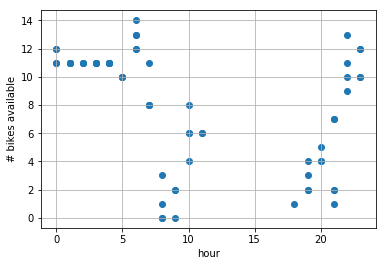

In [6]:
plt.scatter(df.hour,df.num_bikes_available)
plt.grid();
plt.xlabel('hour')
plt.ylabel('# bikes available')

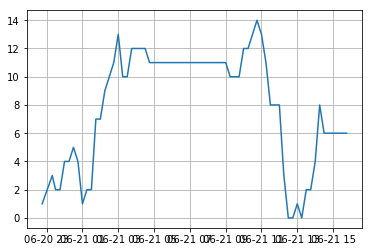

In [7]:
# ** NOTE timestamp is in UTC, which is currently UTC-4 hrs **
plt.plot(df.timestamp_utc,df.num_bikes_available)
plt.grid()